# Import Basic Libraries

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import yfinance as yf
import requests
from datetime import datetime

<h1>Basic Functions</h1>

In [179]:
#----------------------#
#  Stock Informations  #
#----------------------#
def data(ticker_symbol: str, start_date: str, end_date: str, interval: str):
    """
    Download stock data and return as a pandas DataFrame. 
    The data will be stored in a dictionary with the ticker symbol as the key.

    Parameters:
    ticker_symbol: The stock symbol (e.g., 'AAPL').
    start_date: The start date in DD-MM-YYYY format (e.g., '01-01-2020').
    end_date: The end date in DD-MM-YYYY format (e.g., '31-12-2020').
    interval: The data interval. Valid intervals include '1m', '2m', '5m', '15m', '30m', '60m', '90m', '1h', 
              '1d', '5d', '1wk', '1mo', '3mo' (e.g., '1d' for daily data).
    """
    def convert_date_format(date_string):
        return datetime.strptime(date_string, '%d-%m-%Y').strftime('%Y-%m-%d')

    start_date = convert_date_format(start_date)
    end_date = convert_date_format(end_date)

    # Download stock data
    data = yf.download(ticker_symbol, start=start_date, end=end_date, interval=interval)

    # File name
    file_name = f"{ticker_symbol}.csv"

    # Save data to a CSV file
    data.to_csv(file_name)

    # Read the data from the saved CSV file
    dataframe = pd.read_csv(file_name)


    # Calculate VWAP
    price = (dataframe['High'] + dataframe['Low'] + dataframe['Close']) / 3
    vwap = (price * dataframe['Volume']).cumsum() / dataframe['Volume'].cumsum()

    # Insert the VWAP column after the 'Close' column
    dataframe.insert(dataframe.columns.get_loc('Close') + 1, 'VWAP', vwap)

    # Create a global variable based on the part of the ticker_symbol before the '.'
    variable_name = ticker_symbol.split('.')[0]
    globals()[variable_name] = dataframe

#-----------------------#
#  Plot Specific Stock  #
#-----------------------#

def plots(stock, type):
    # Determine the variable name
    stock_name = [name for name, df in globals().items() if id(df) == id(stock) and name != "stock"][0]

    # Create a figure and a set of subplots
    fig, axs = plt.subplots(1, 2, figsize=(14, 7))
    
    # KDE plot for data using Seaborn
    sns.kdeplot(stock[type], fill=True, color='g', ax=axs[0])
    axs[0].set_title('KDE Plot of ' + type + ' (' + stock_name + ')')
    
    # Line plot for data using Pandas
    stock[type].plot(ax=axs[1])
    axs[1].set_title('Line Plot of ' + type + ' (' + stock_name + ')')
    axs[1].set_ylabel('VWAP')
    
    # Show the plots
    plt.tight_layout()
    plt.show()


<h1>Analysis</h1>

<h2>1. Download & Read Data</h2>

In [189]:
data('ETE.AT', '02-12-2023', '09-12-2023', '1m')
data('ELPE.AT', '02-12-2023', '09-12-2023', '1m')
data('ENIC', '02-12-2023', '09-12-2023', '1m')
data('HBI', '02-12-2023', '09-12-2023', '1m')
data('ATUS', '02-12-2023', '09-12-2023', '1m')
data('SABR', '02-12-2023', '09-12-2023', '1m')
data('LYG', '02-12-2023', '09-12-2023', '1m')
data('SIRI', '02-12-2023', '09-12-2023', '1m')

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


<h2>2. Stocks </h2>


<h3>2.1 Specific Stock</h3>

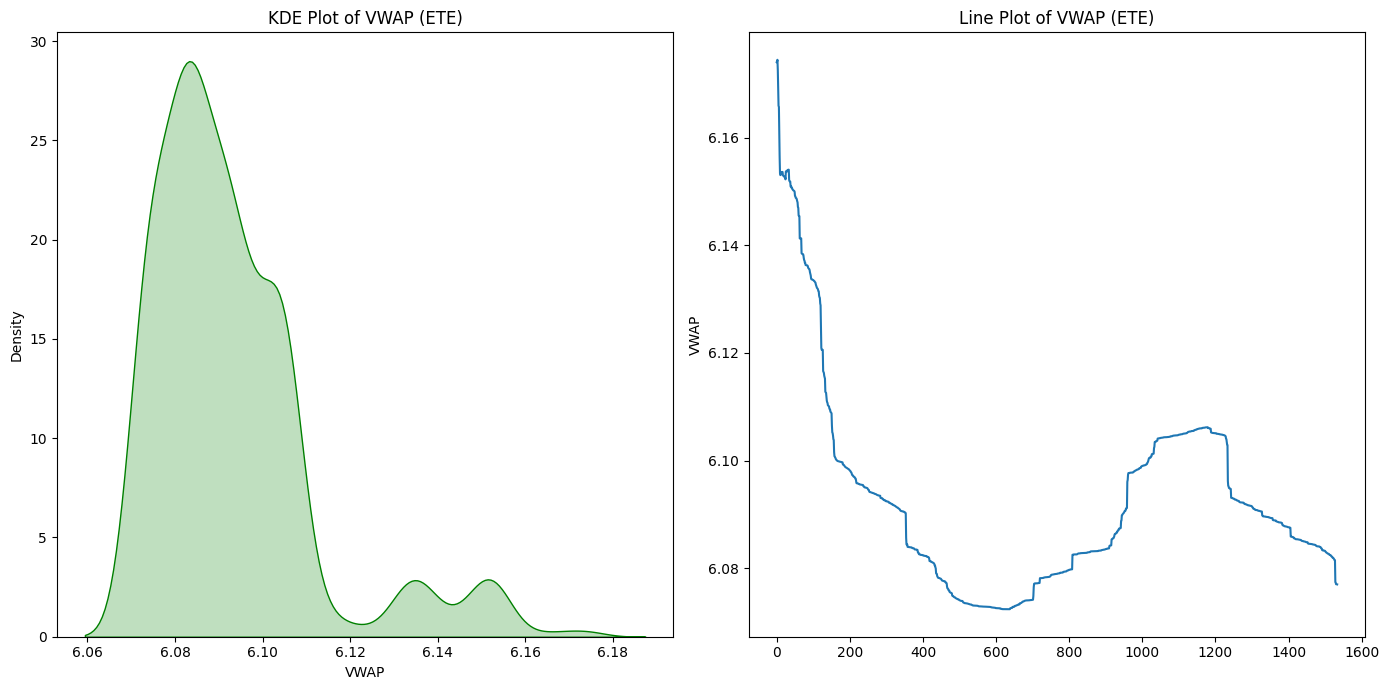

In [190]:
stock = ETE
type = 'VWAP'

plots(stock,type)

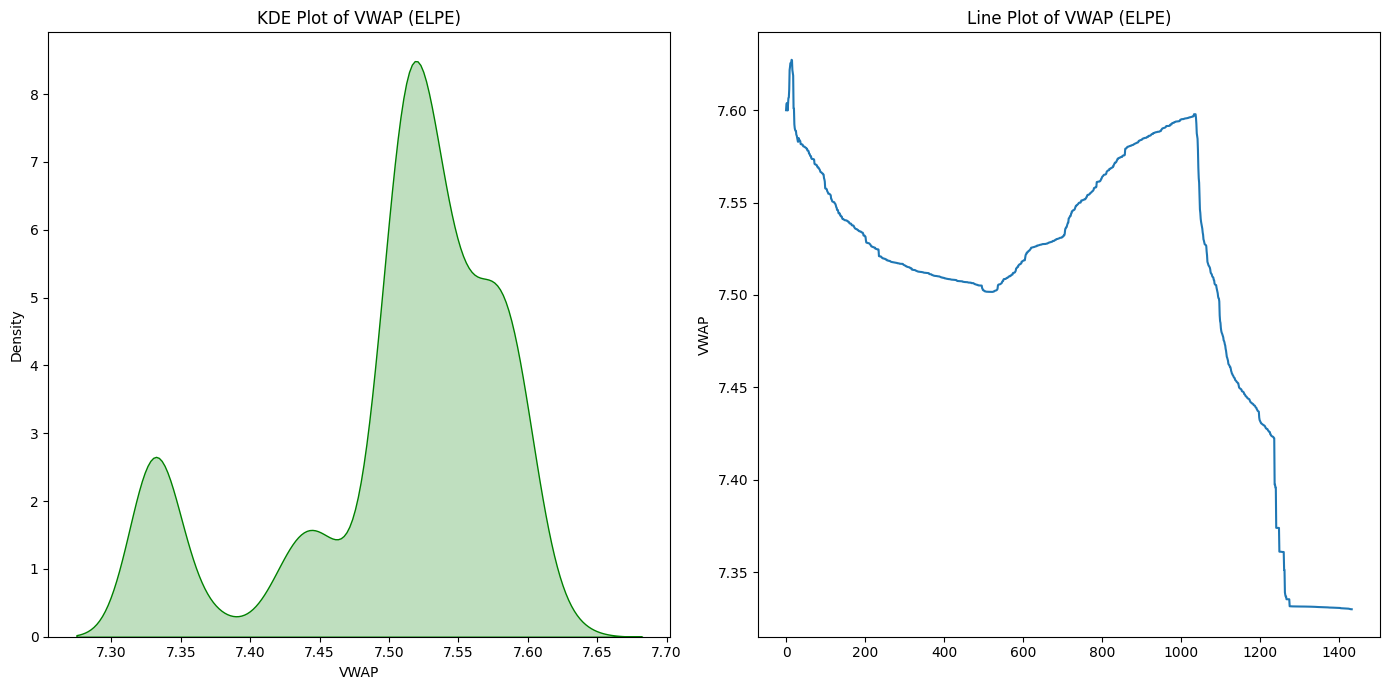

In [191]:
stock = ELPE
type = 'VWAP'

plots(stock,type)

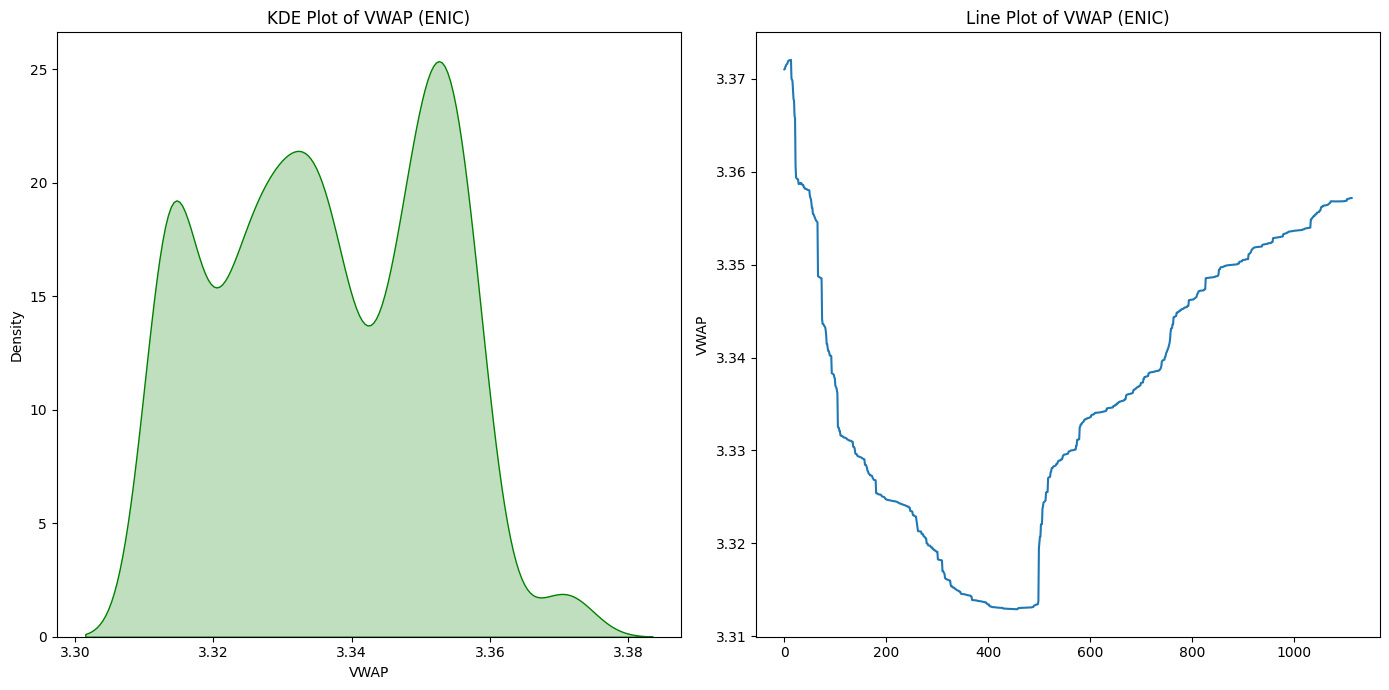

In [192]:
stock = ENIC
type = 'VWAP'

plots(stock,type)

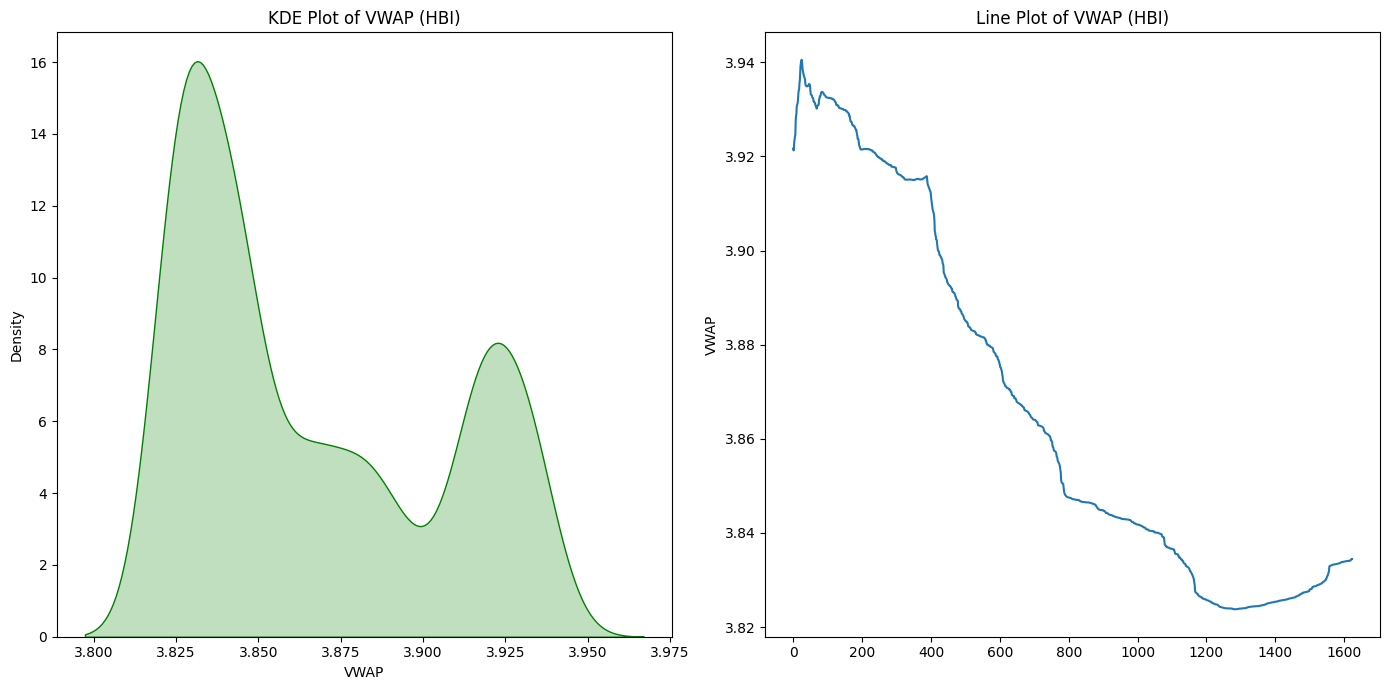

In [193]:
stock = HBI
type = 'VWAP'

plots(stock,type)

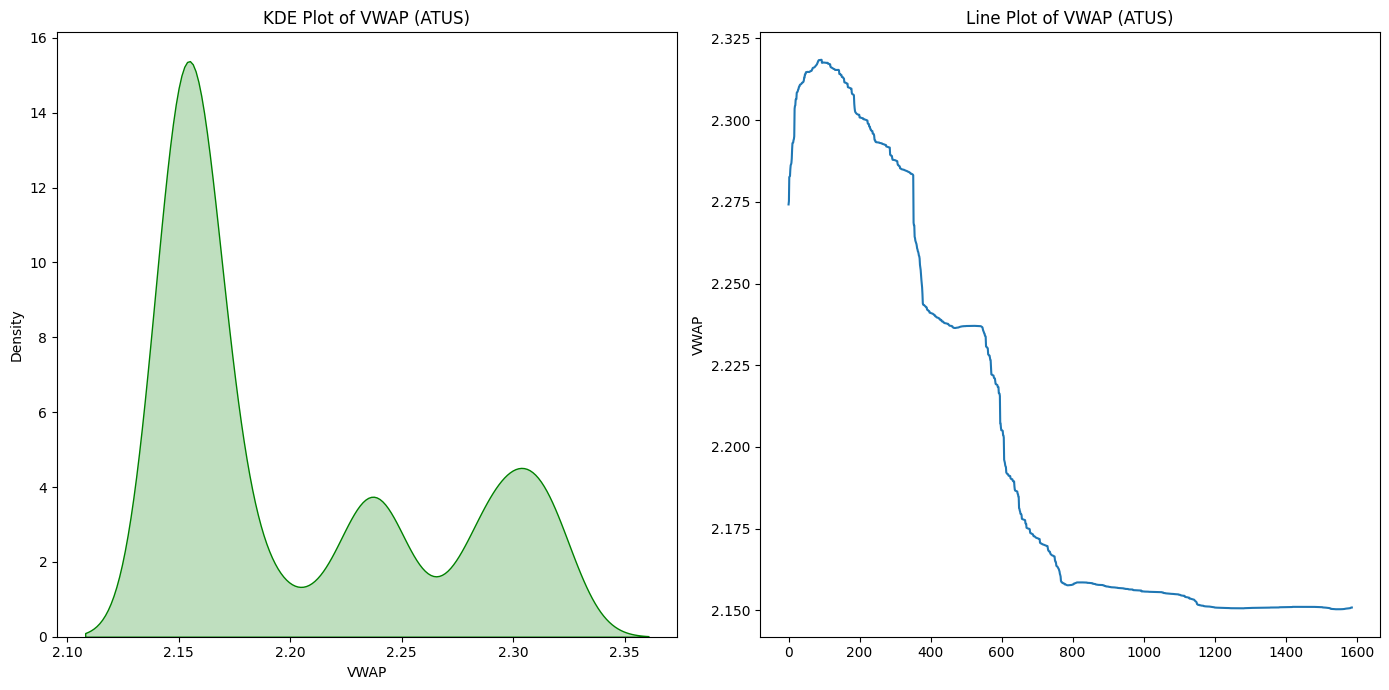

In [194]:
stock = ATUS
type = 'VWAP'

plots(stock,type)

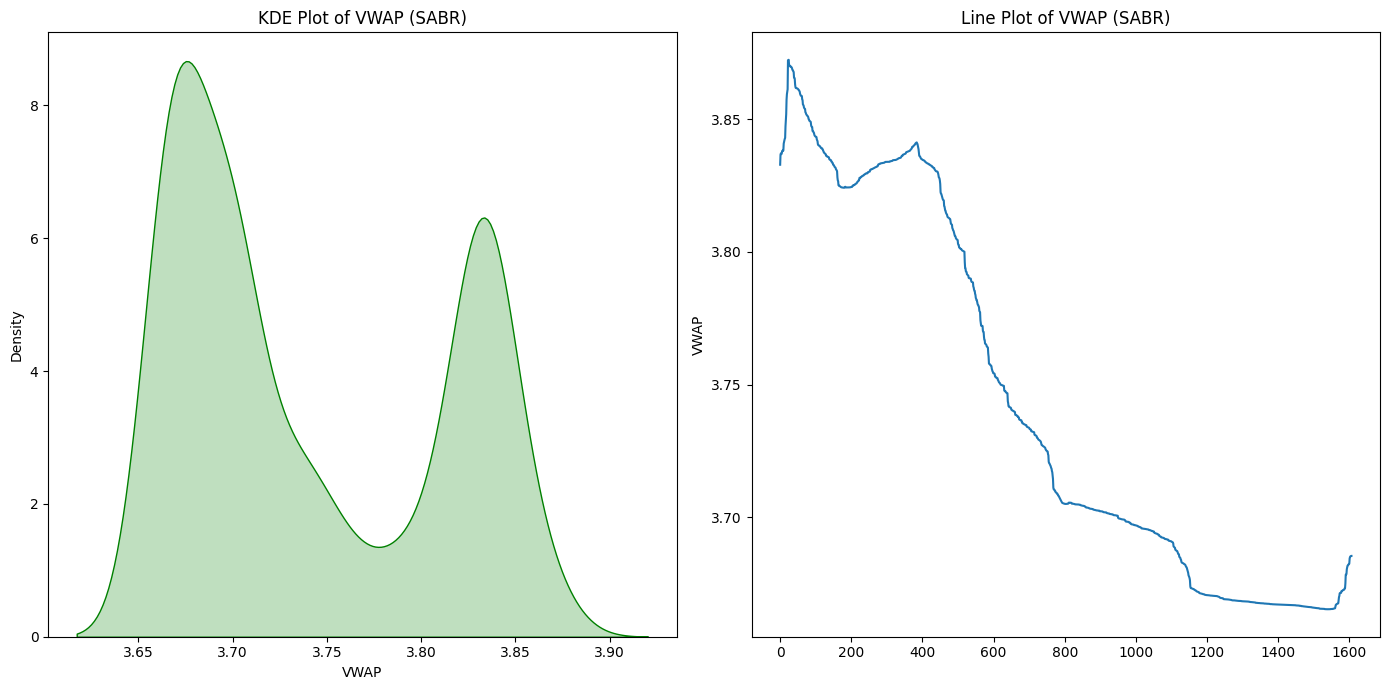

In [195]:
stock = SABR
type = 'VWAP'

plots(stock,type)

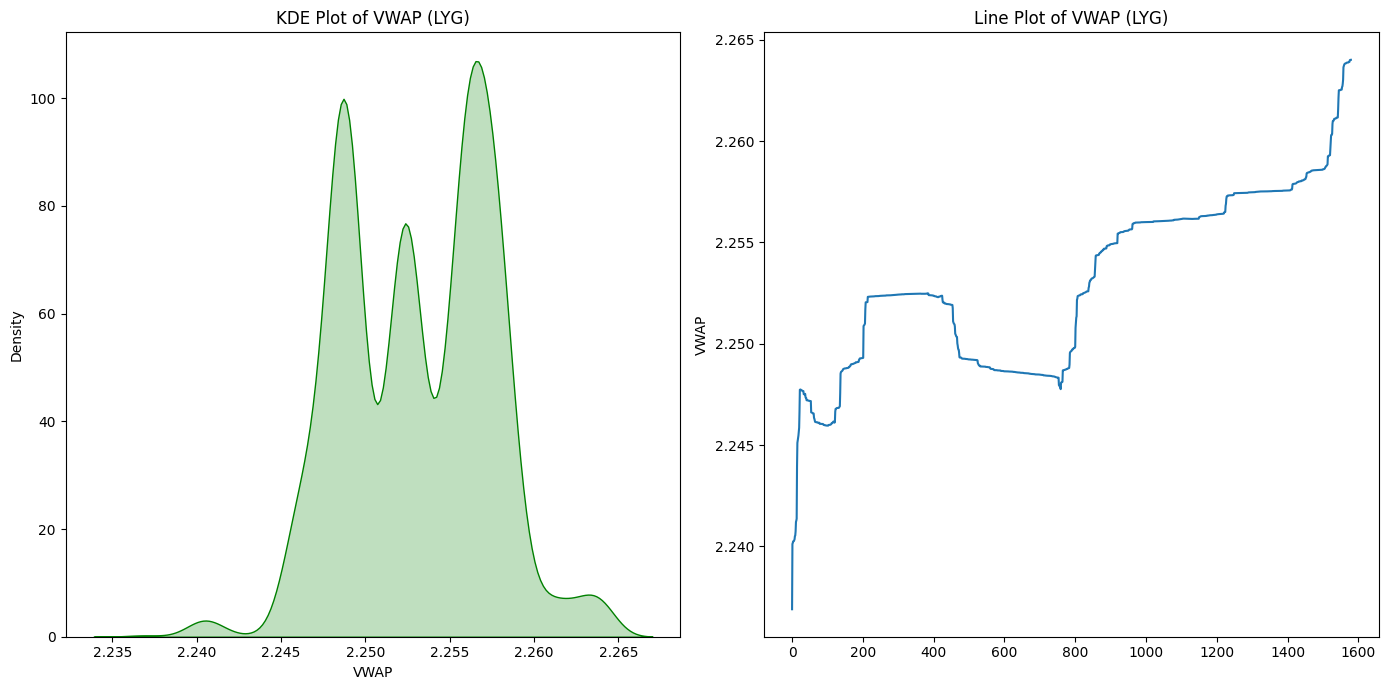

In [197]:
stock = LYG
type = 'VWAP'

plots(stock,type)

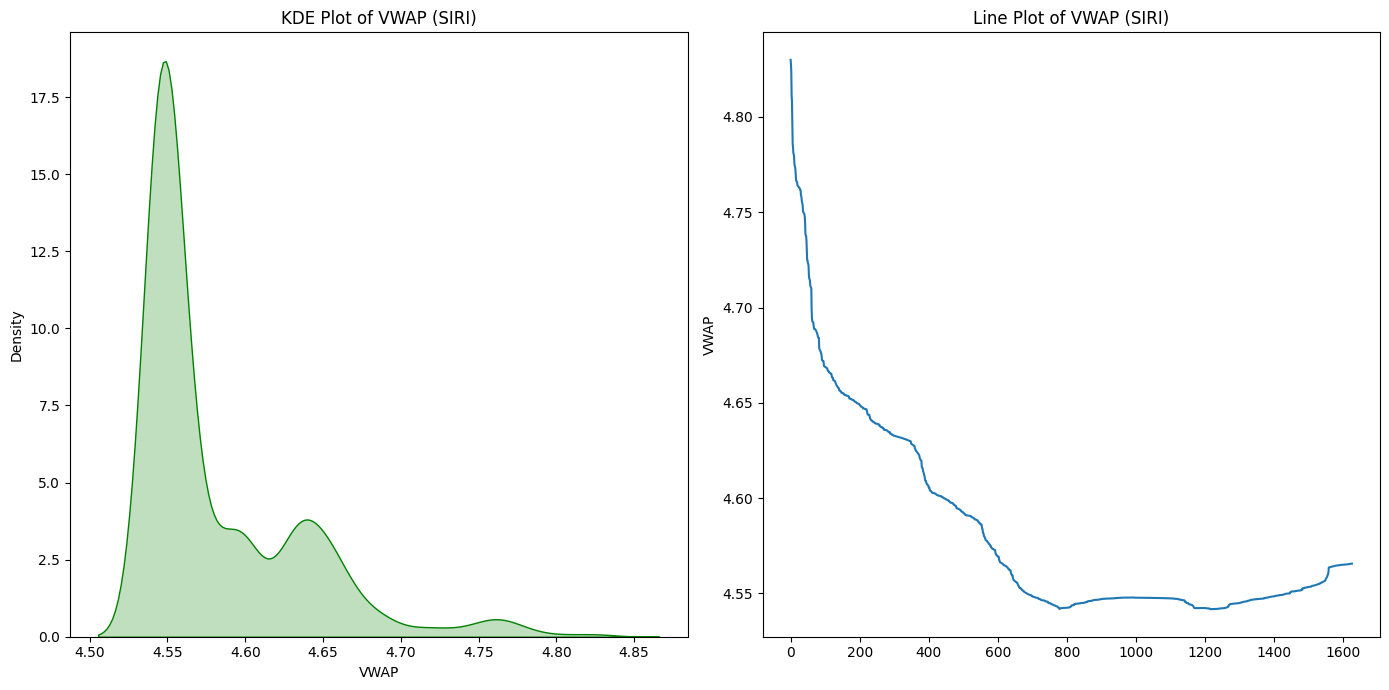

In [198]:
stock = SIRI
type = 'VWAP'

plots(stock,type)